Regional and Online Learnable Fields (ROLF) are a technical implementation of the physical makeup of the neural network in the retina and eye. See http://dx.doi.org/10.1109/IJCNN.2004.1380021 and other work from the Goerke Lab at Universität Bonn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=127)

In [3]:
class RolfNetwork:   
    def __init__(self, sigma=1.50, p=2.0, nc=0.01, ns=0.01):
        self.init_sigma = sigma
        self.p = p 
        self.nc = nc
        self.ns = ns
        self.neurons = set()
    
    def default_sigma(self):
        return np.mean([neuron.sigma for neuron in self.neurons]) if self.neurons else self.init_sigma
    
    def train(self, x):
        distances = {neuron: np.linalg.norm(np.subtract(neuron.center, x)) for neuron in self.neurons}     
        receptive = {neuron for neuron, distance in distances.items() if distance < neuron.sigma * self.p}
        if receptive:
            neuron = min(distances, key=distances.get)
            neuron.center += self.nc * np.subtract(x, neuron.center)
            neuron.sigma  += self.ns * np.subtract(distances[neuron], neuron.sigma)
        else:    
            self.neurons.add(self.RolfNeuron(x, self.default_sigma()))
    
    def classify(self, x):
        for neuron in self.neurons:
            if np.linalg.norm(np.subtract(x, neuron.center)) < neuron.sigma:
                return (neuron.center, neuron.sigma)
        return None
    
    class RolfNeuron:
        def __init__(self, center, sigma):
            self.center = np.array(center)
            self.sigma = sigma

        def __repr__(self):
            return "RolfNeuron(center={}, sigma={})".format(self.center, self.sigma)

    def __repr__(self):
        return "RolfNetwork(sigma={}, p={}, nc={}, ns={})".format(self.init_sigma, self.p, self.nc, self.ns)     

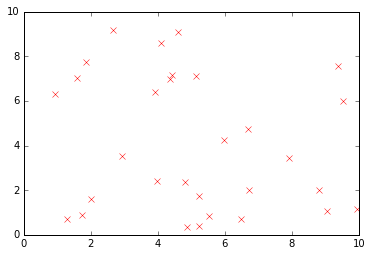

In [4]:
data = np.random.uniform(low=0, high=10, size=(30, 2))
for point in data: 
    plt.plot(*point, 'rx')

In [5]:
net = RolfNetwork(sigma=1.05, p=2, nc=0.1, ns=0.1)
for point in data:
    net.train(point)
print(net)

RolfNetwork(sigma=1.05, p=2, nc=0.1, ns=0.1)


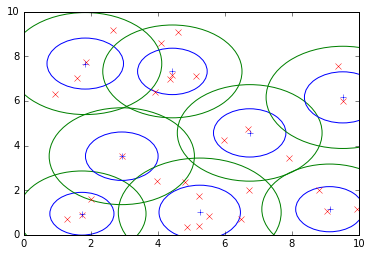

In [6]:
for point in data:
    plt.plot(*point, 'rx')
for neuron in net.neurons:
    plt.plot(*neuron.center, 'b+') 
    circle1 = plt.Circle(neuron.center, radius=neuron.sigma, color='b', fill=False)
    circle2 = plt.Circle(neuron.center, radius=neuron.sigma * net.p, color='g', fill=False)
    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)